In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Mall_customers.csv')

In [3]:
data = data.drop('CustomerID',axis=1)

In [4]:
data.columns=['gender','age','income','spending']

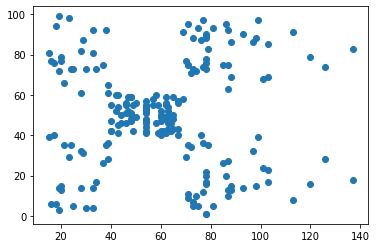

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data.income,data.spending)

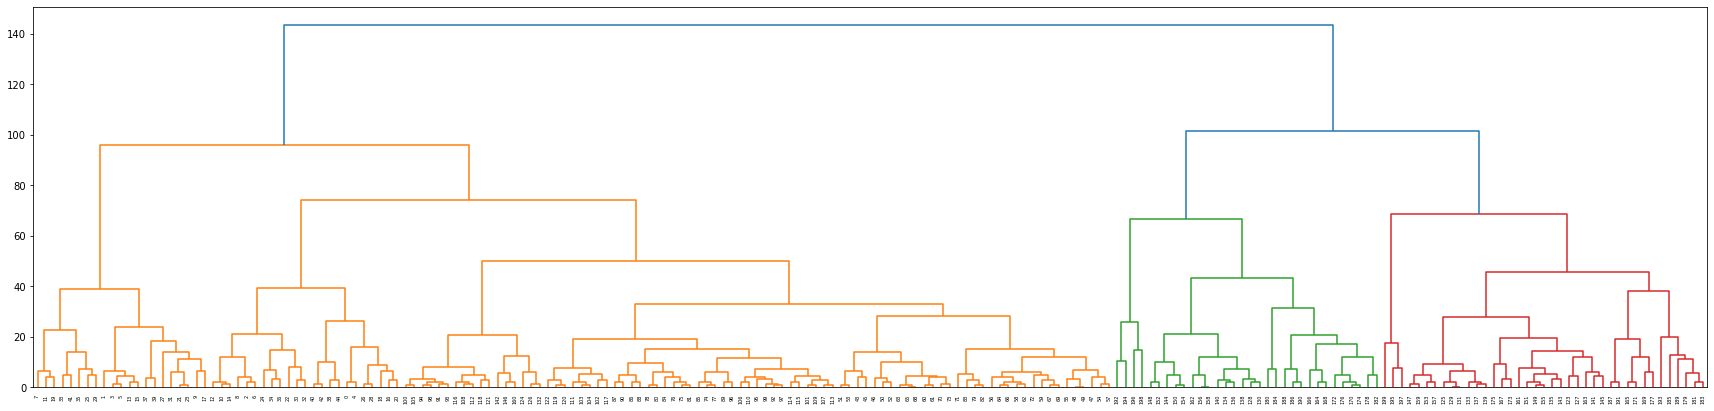

Wall time: 11.8 s


In [11]:
%%time
import scipy.cluster.hierarchy as sch

x = data[['income','spending']]

plt.figure(figsize=(30,7))
sch.dendrogram(sch.linkage(x,method='complete'))
plt.show()


In [19]:
from sklearn.cluster import AgglomerativeClustering

clu = AgglomerativeClustering(n_clusters=5,linkage='ward')

clu.fit(x)

x['cluster'] = clu.fit_predict(x.values)

<ipython-input-19-e2db4dbd231c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] = clu.fit_predict(x.values)


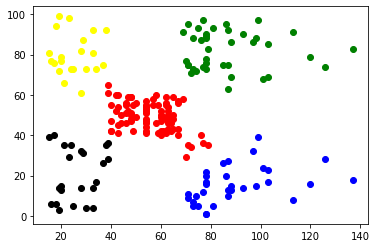

In [20]:
zero = x[x.cluster == 0]
one = x[x.cluster == 1]
two = x[x.cluster == 2]
three = x[x.cluster == 3]
four = x[x.cluster == 4]

plt.scatter(zero.income,zero.spending,color='blue')
plt.scatter(one.income,one.spending,color='red')
plt.scatter(two.income,two.spending,color='green')
plt.scatter(three.income,three.spending,color='yellow')
plt.scatter(four.income,four.spending,color='black')


In [22]:
x

,income,spending,cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0
